In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import openweathermapy.core as owm
import random
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
#import API key
from config import wkey

In [2]:
# assigning variable to the citipy cities dictionary
city = citipy.WORLD_CITIES_DICT
#creating a city list to loop through citipy
cities=[]

#looping through citipy to get list of 500 random lat and longitude
for i in range(500):
   a = list(city)
   b = random.choice(a)
   cities.append(b)

#placing random list of 500 cities from citipy into a dataframe
import_df= pd.DataFrame(cities)

# New data frame with formated columns to hold randomly lat & lng & weather info
cities_df = pd.DataFrame()
cities_df["Latitude"] = import_df[0]
cities_df["Longitude"] = import_df[1]
cities_df["City Name"] = ""
cities_df["Country Code"] = ""
cities_df["Temperature"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Humidity"] = ""

#cities_df.head()

In [3]:
#looping through the latitude and longitude values from citypy to get the city name and country code
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"City Name",city.city_name)
    cities_df.set_value(index,"Country Code",city.country_code)
    
#cities_df.head()

C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [4]:
# Create settings dictionary with information we're interested in

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
settings = {"units": "metric", "appid": wkey}
for index,row in cities_df.iterrows():
    city = row["City Name"]
    country = row ["Country Code"]
    city_country = str(city)+ "," + str(country)
    
    #using try and except method incase API has missing data for random sample of cities
    try:
        #creating variable for API call       
        current_weather_url = url + "&appid=" + wkey + "&q=" + city_country
        current_weather = requests.get(current_weather_url).json()
        #appending data pulled in the loop to the cities dataframe
        cities_df.set_value(index, "Temperature", current_weather.get("main",{}).get("temp"))
        cities_df.set_value(index, "Humidity", current_weather.get("main",{}).get("humidity"))
        cities_df.set_value(index, "Cloudiness", current_weather.get("clouds",{}).get("all"))
        cities_df.set_value(index, "Wind Speed", current_weather.get("wind",{}).get("speed"))
        print(f"Running Current Weather Information for {city}")
        print(current_weather_url)
    except:
        cities_df.set_value(index, "Temperature", current_weather.get("main",{}).get("temp"))
        cities_df.set_value(index, "Humidity", current_weather.get("main",{}).get("humidity"))
        cities_df.set_value(index, "Cloudiness", current_weather.get("clouds",{}).get("all"))
        cities_df.set_value(index, "Wind Speed", current_weather.get("wind",{}).get("speed"))
        print(f"No Data found for {city}")
        print(current_weather_url)  
              


C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brgrave1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Running Current Weather Information for san jose acatempa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san jose acatempa,gt
Running Current Weather Information for tiszabercel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiszabercel,hu
Running Current Weather Information for tinde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tinde,tz
Running Current Weather Information for naisud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=naisud,ph
Running Current Weather Information for carmo do cajuru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=carmo do cajuru,br
Running Current Weather Information for nova bystrice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9

Running Current Weather Information for anenecuilco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=anenecuilco,mx
Running Current Weather Information for manguito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=manguito,cu
Running Current Weather Information for malatap
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=malatap,ph
Running Current Weather Information for livadia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=livadia,cy
Running Current Weather Information for bhagalpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bhagalpur,in
Running Current Weather Information for cavite
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cavite,ph
Running Current 

Running Current Weather Information for tinqueux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tinqueux,fr
Running Current Weather Information for creteni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=creteni,ro
Running Current Weather Information for kravare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kravare,cz
Running Current Weather Information for upig
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=upig,ph
Running Current Weather Information for tierralta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tierralta,co
Running Current Weather Information for komlo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=komlo,hu
Running Current Weather Informat

Running Current Weather Information for coevorden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=coevorden,nl
Running Current Weather Information for gemunden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gemunden,de
Running Current Weather Information for katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=katsuura,jp
Running Current Weather Information for chiredzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chiredzi,zw
Running Current Weather Information for gogosari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gogosari,ro
Running Current Weather Information for berlin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=berlin,de
Running Current We

Running Current Weather Information for torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=torbay,ca
Running Current Weather Information for ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ilulissat,gl
Running Current Weather Information for bordesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bordesti,ro
Running Current Weather Information for polikarpion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=polikarpion,gr
Running Current Weather Information for south houston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=south houston,us
Running Current Weather Information for bourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bourne,gb
Runnin

Running Current Weather Information for lloro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lloro,co
Running Current Weather Information for kez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kez,ru
Running Current Weather Information for surany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=surany,sk
Running Current Weather Information for san miguelito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san miguelito,pa
Running Current Weather Information for barlinek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=barlinek,pl
Running Current Weather Information for tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tura,in
Running Current Weather Informatio

Running Current Weather Information for almaguer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=almaguer,ph
Running Current Weather Information for belaguntha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=belaguntha,in
Running Current Weather Information for maurepas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maurepas,fr
Running Current Weather Information for thouars
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=thouars,fr
Running Current Weather Information for worthington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=worthington,us
Running Current Weather Information for bradesti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bradesti,ro
Running 

Running Current Weather Information for nova vcelnice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nova vcelnice,cz
Running Current Weather Information for chiclayo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chiclayo,pe
Running Current Weather Information for khardaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=khardaha,in
Running Current Weather Information for turka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=turka,ua
Running Current Weather Information for agdangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=agdangan,ph
Running Current Weather Information for volovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=volovo,ru
Running Current 

Running Current Weather Information for cordeiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cordeiro,br
Running Current Weather Information for kolkwitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kolkwitz,de
Running Current Weather Information for guaymitas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=guaymitas,hn
Running Current Weather Information for nilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nilo,co
Running Current Weather Information for el ocoton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=el ocoton,hn
Running Current Weather Information for woensdrecht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=woensdrecht,nl
Running Curren

Running Current Weather Information for vekso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vekso,dk
Running Current Weather Information for srivilliputtur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=srivilliputtur,in
Running Current Weather Information for paris
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=paris,us
Running Current Weather Information for mezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mezhevoy,ru
Running Current Weather Information for ballater
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ballater,gb
Running Current Weather Information for tagnanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tagnanan,ph
Running Current 

In [5]:
cities_df.to_csv("cities_weather_data.csv", header = True)
#cities_df.head()

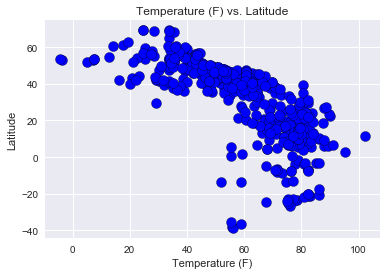

In [8]:
#Temperature (F) vs. Latitude

#using seaborn
sns.set()
#assigining variables to x and y axis
temp= cities_df["Temperature"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="blue",edgecolors="black", s=100 )

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Temperature (F) vs. Latitude.png")

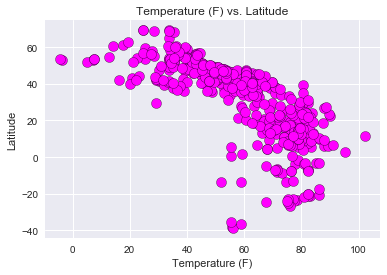

In [9]:
#Humidity (%) vs. Latitude

#using seaborn
sns.set()
#assigining variables to x and y axis
temp= cities_df["Temperature"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="magenta",edgecolors="black",s=100 )
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Temperature (F) vs. Latitude.png")

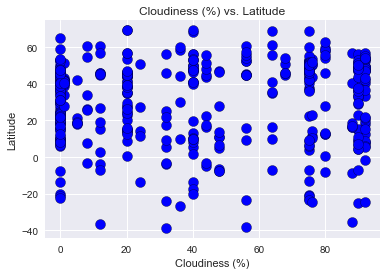

In [10]:
#Cloudiness (%) vs. Latitude
#using seaborn
sns.set()
#assigining variables to x and y axis
cloudiness= cities_df["Cloudiness"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(cloudiness, lat, marker="o", color="blue",edgecolors="black",s=100 )
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Cloudiness (%) vs. Latitude.png")

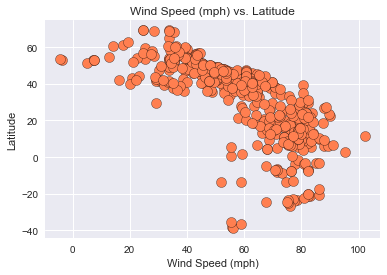

In [11]:
#Wind Speed (mph) vs. Latitude
#using seaborn
sns.set()
#assigining variables to x and y axis
wind= cities_df["Wind Speed"]
lat= cities_df["Latitude"]

#creating and formating scatter plot
plt.scatter(temp, lat, marker="o", color="coral",edgecolors="black", s=100)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
plt.savefig("Wind Speed (mph) vs. Latitude.png")